In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D


print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Version:",tf.__version__)

import matplotlib.pyplot as plt
import time

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Num GPUs Available: 1
Version: 2.5.0-rc1


In [2]:
#import dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#Data augmentation
#Add a copy of all images flipped left to right
train_images = tf.concat([train_images, tf.image.flip_left_right(train_images)], axis=0)
train_labels = tf.concat([train_labels, train_labels], axis=0)

#Validation data
val_images = train_images[:2500]
val_labels = train_labels[:2500]

train_images = train_images[2500:]
train_labels = train_labels[2500:]

In [4]:
#Architecture
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPooling2D(),

    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    Dropout(0.25),
    MaxPooling2D(),

    Conv2D(128, 3, activation='relu', padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    Dropout(0.25),
    MaxPooling2D(),

    Conv2D(256, 3, activation='relu', padding='same'),
    Conv2D(256, 3, activation='relu', padding='same'),
    Dropout(0.5),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(10)

])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [6]:
#Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
#Train model
batch_size = 512

startTime = time.time()
history = model.fit(train_images, train_labels, epochs=25, batch_size=batch_size,
                    validation_data=(val_images, val_labels)

finishTime = time.time()

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpqqsa6277.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpqqsa6277.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
191/191 [==============================] - 29s 67ms/step - loss: 1.9892 - accuracy: 0.2513 - val_loss: 1.5045 - val_accuracy: 0.4929
Epoch 2/25
191/191 [==============================] - 11s 59ms/step - loss: 1.2807 - accuracy: 0.5276 - val_loss: 1.2302 - val_accuracy: 0.5929
Epoch 3/25
191/191 [==============================] - 11s 56ms/step - loss: 0.9893 - accuracy: 0.6438 - val_

In [8]:
#Print train time
timeTaken = finishTime - startTime
minutes = timeTaken // 60
seconds = round((timeTaken % 60), 1)
print(f"Time taken: {minutes}m, {seconds}s" )

Time taken: 4.0m, 46.9s


In [9]:
#Evaluate model with test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2, batch_size=batch_size)
print(f'\nTest accuracy: {round(test_acc *100, 2)}%')

20/20 - 0s - loss: 0.5244 - accuracy: 0.8357

Test accuracy: 83.57%


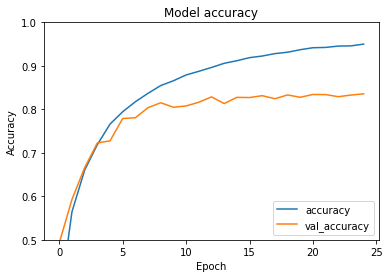

In [10]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

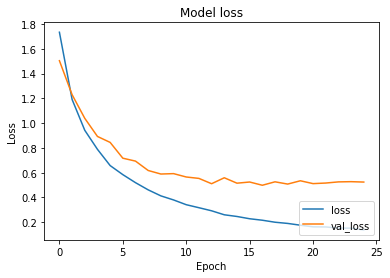

In [11]:
#Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(loc='lower right')
plt.show()